# Computer Hardware Dataset Analysis - UCI

This is a regression analysis of the <a href="https://archive.ics.uci.edu/ml/datasets/Computer+Hardware">UCI Computer Analysis Dataset.</a>

In [2]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
data = pd.read_csv(url, header=None)

In [20]:
data.head()

,VENDOR,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,125,256,6000,256,16,128,198
1,amdahl,29,8000,32000,32,8,32,269
2,amdahl,29,8000,32000,32,8,32,220
3,amdahl,29,8000,32000,32,8,32,172
4,amdahl,29,8000,16000,32,8,16,132


## Attribute Information

Attribute Information:

   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)

In [5]:
data.columns = ['VENDOR', 'MODEL', 'MYCT', 'MMIN', 
                 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

In [6]:
# Drop the ERP column - this is an estimate
data = data.drop('ERP', axis=1)

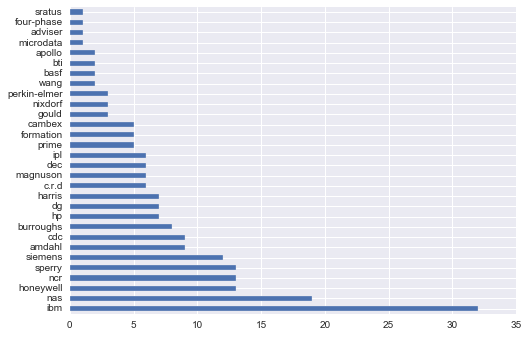

In [7]:
data.VENDOR.value_counts().plot(kind='barh')

In [8]:
# Drop the model column as well
data = data.drop('MODEL', axis=1)

## Univariate Analysis

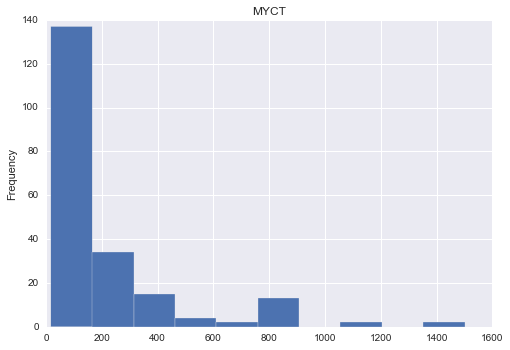

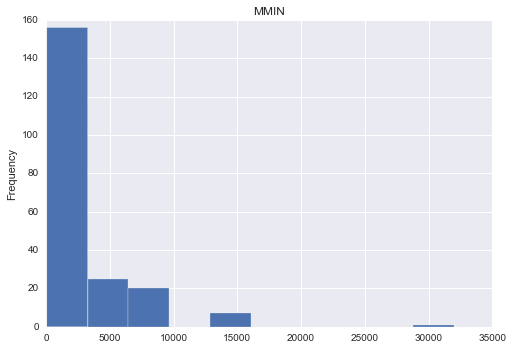

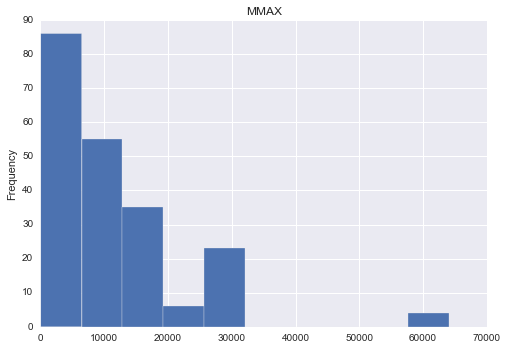

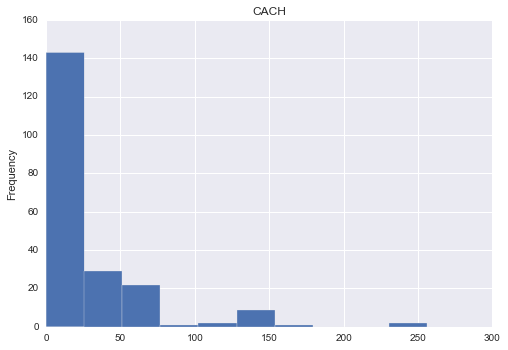

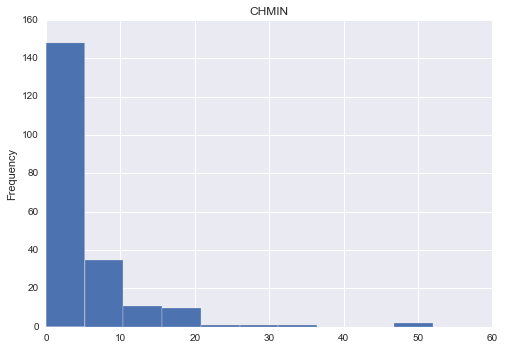

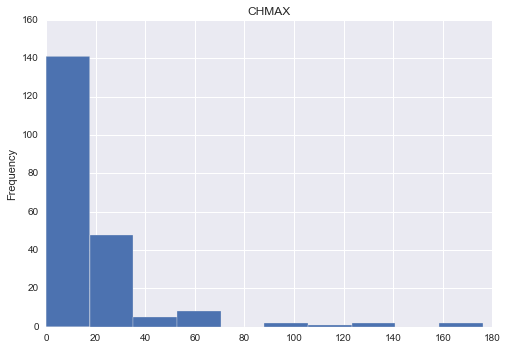

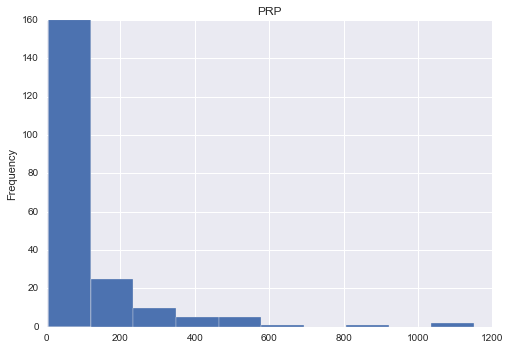

In [9]:
feature_names = data.columns.drop('VENDOR')

for fname in feature_names:
    _ = pylab.figure()
    _ = data.loc[:, fname].plot(kind='hist', title=fname)

## Bivariate Analysis

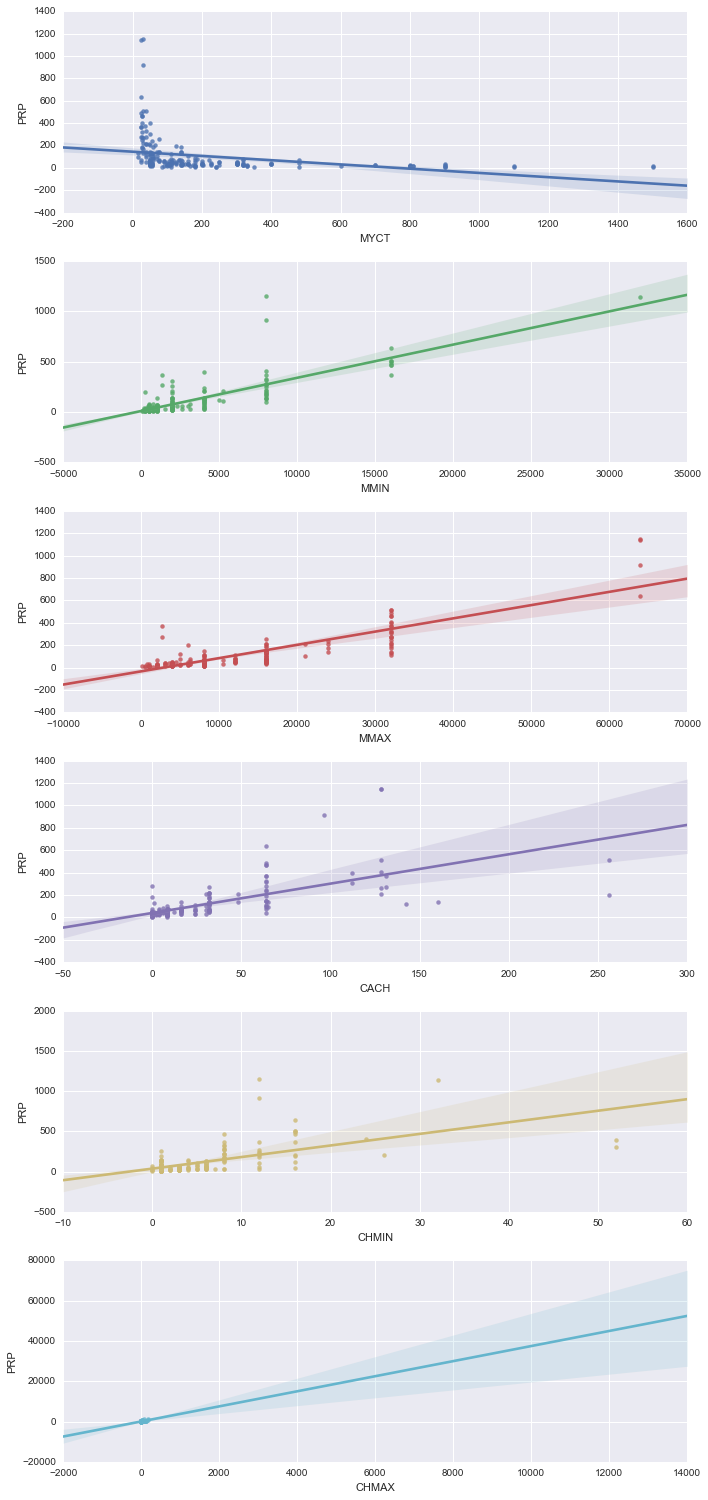

In [10]:
_, axes = pylab.subplots(6, figsize=(10, 21))

n_columns = data.columns.drop(['VENDOR', 'PRP'])

for i, fname in enumerate(n_columns):
    sns.regplot(x=fname, y='PRP', data=data, ax=axes[i])
    
pylab.tight_layout()

## Correlations with Target Column

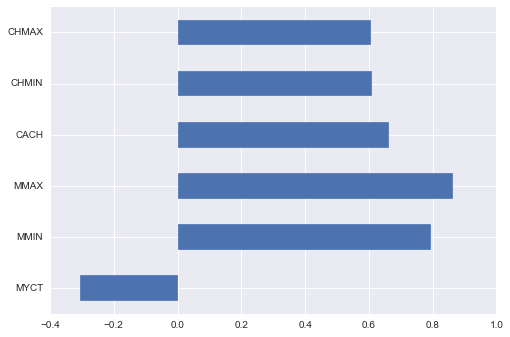

In [11]:
corrs = data.loc[:, n_columns].corrwith(data.loc[:, 'PRP'])
corrs.plot(kind='barh')

## Feature Correlations

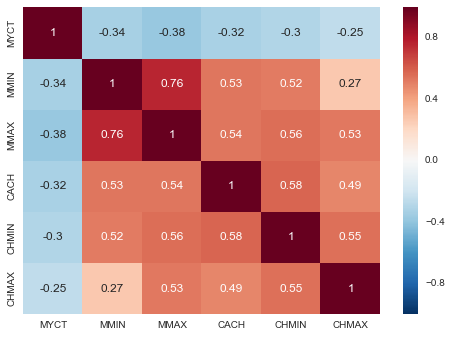

In [12]:
f_corrs = data.loc[:, n_columns].corr()
sns.heatmap(f_corrs, annot=True)

## The Regression Model

In [13]:
import statsmodels.formula.api as sm

In [14]:
model = sm.ols(formula='PRP ~ MMAX + MMIN + CACH + CHMAX', data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 06 Aug 2017   Prob (F-statistic):           9.84e-86
Time:                        09:32:36   Log-Likelihood:                -1152.7
No. Observations:                 209   AIC:                             2315.
Df Residuals:                     204   BIC:                             2332.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.9794      6.042     -6.783      0.000     -52.891     -29.068
MMAX           0.0053      0.001      8.264      0.000       0.004       0.007
MMIN           0.0149      0.002      8.202      0.000       0.011       0.018
CACH           0.5873      0.136      4.326      0.000       0.320       0.855
CHMAX          1.4359      0.211      6.807      0.000       1.020       1.852
==============================================================================
Omnibus:                      105.696   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1234.809
Skew:                           1.613   Prob(JB):                    7.32e-269
Kurtosis:                      14.463   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cross Validation

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [26]:
n_splits = 3
fold = KFold(n_splits=n_splits, shuffle=True)

scores = []

for train_idx, test_idx in fold.split(data):
    model = sm.ols(formula='PRP ~ MMAX + MMIN + CACH + CHMAX', data=data.loc[train_idx])
    result = model.fit()
    test_features = data.loc[test_idx].drop('PRP', axis=1)
    
    predictions = result.predict(test_features)
    actual = data.loc[test_idx, 'PRP']
    
    score = r2_score(actual, predictions)
    scores.append(score)
    
scores = pd.Series(scores)

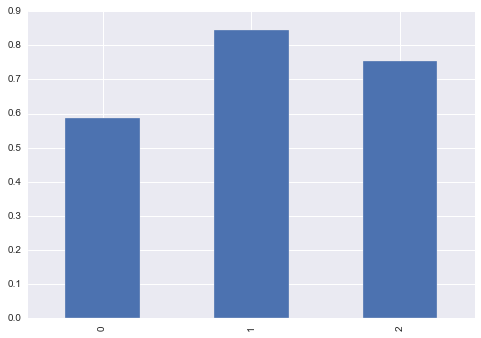

In [27]:
scores.plot(kind='bar')